### Detectron2 - followed up the documentation

In [5]:
!pip install pyyaml==5.1

/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
     |████████████████████████████████| 274 kB 1.5 MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-linux_x86_64.whl size=634273 sha256=ceadb8106eda316d9ece7bda4a6409e4e9d029a594f5de2c0814e22e383ab658
  Stored in directory: /home/ravina/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
ERROR: jupyter-events 0.6.3 has requirement pyyaml>=5.3, but you'll have pyyaml 5.1 which is incompatible.
ERROR: open3d 0.13.0 has requirement pyyaml>=5.4.1, but you'll have pyyaml 5.1 which is incompatible.
ERROR: ultralytics 8.1.29 has requirement pyyaml>=5.3.1, but you'll have pyyaml 5.1 which is incompatible.
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML

In [1]:
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

fatal: destination path 'detectron2' already exists and is not an empty directory.
/bin/bash: python: command not found


In [2]:
import torch
import detectron2

In [9]:
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

torch:  2.0 ; cuda:  cu117
detectron2: 0.6


In [14]:
!pip install iopath

/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
     |████████████████████████████████| 42 kB 562 kB/s eta 0:00:01
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31531 sha256=56d40a61dbf52a4c795f029d5a66b1977dcb5ae7ae599ddff63054e6b5aa89a5
  Stored in directory: /home/ravina/.cache/pip/wheels/89/3e/24/0f349c0b2eeb6965903035f3b00dbb5c9bea437b4a2f18d82c
Successfully built iopath


In [16]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html

/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html
     |████████████████████████████████| 6.1 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 439 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 491 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 154 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 130 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 117 kB 5.0 MB/s eta 0:00:01
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61405 sha256=7bc5b7cc07559eae5043992e7512085aa9fa9022d9fe682506609a6f88aa69a2
  Stored in directory: /ho

In [16]:
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [5]:
my_new_image = cv2.imread("Images/image.png")
cv2.imshow("Street Image", my_new_image)
cv2.waitKey(10)

113

KeyPoint detection Model

[DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl ...
[Checkpointer] Loading from /home/ravina/.torch/iopath_cache/detectron2/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.


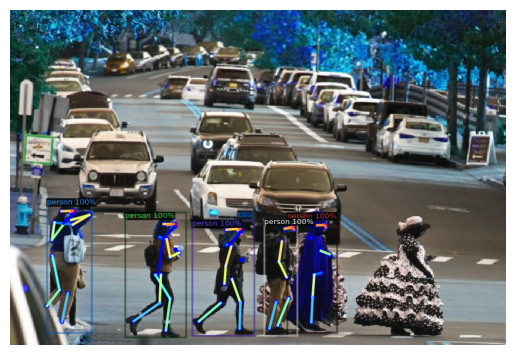

In [11]:
# Inference with a keypoint detection model
cfg_keypoint = get_cfg()   # get a fresh new config
cfg_keypoint.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg_keypoint.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg_keypoint.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg_keypoint)
outputs = predictor(my_new_image)
v = Visualizer(my_new_image[:,:,::-1], MetadataCatalog.get(cfg_keypoint.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
import matplotlib.pyplot as plt

# Convert BGR to RGB for displaying with matplotlib
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis('off')
plt.show()

[DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from /home/ravina/.torch/iopath_cache/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'


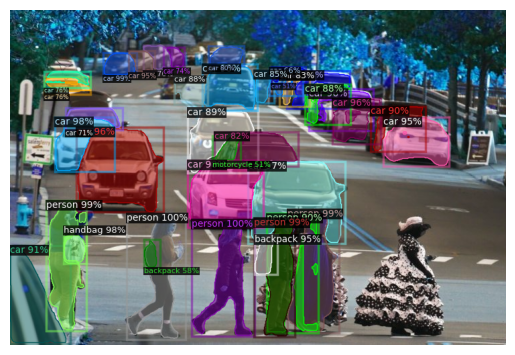

In [15]:

# Inference with instance segmentation
cfg_inst = get_cfg()
cfg_inst.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg_inst.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo.  https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md
cfg_inst.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg_inst)
outputs = predictor(my_new_image)

v = Visualizer(my_new_image[:, :, ::-1], MetadataCatalog.get(cfg_inst.DATASETS.TRAIN[0]), scale=1.0)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Convert BGR to RGB for displaying with matplotlib
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis('off')
plt.show()

[DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl ...
[Checkpointer] Loading from /home/ravina/.torch/iopath_cache/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl ...
Reading a file from 'Detectron2 Model Zoo'


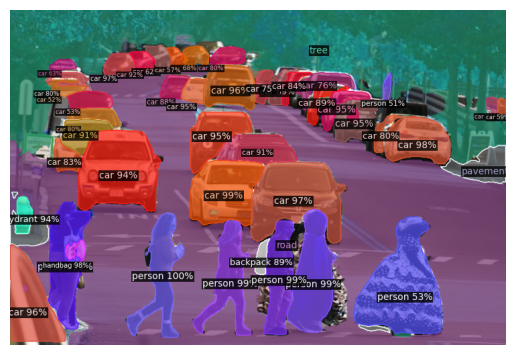

In [14]:
# Inference with a panoptic segmentation model
cfg_pan = get_cfg()
cfg_pan.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg_pan.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg_pan)
panoptic_seg, segments_info = predictor(my_new_image)["panoptic_seg"]
v = Visualizer(my_new_image[:, :, ::-1], MetadataCatalog.get(cfg_pan.DATASETS.TRAIN[0]), scale=1.0)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)

# Convert BGR to RGB for displaying with matplotlib
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis('off')
plt.show()

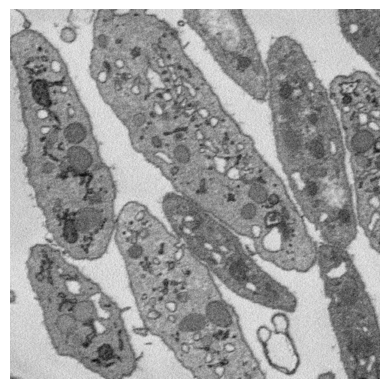

In [17]:
sci_im = cv2.imread("/home/ravina/Desktop/Detectron2/Images/cells.png")
plt.imshow(sci_im)
plt.axis('off')
plt.show()

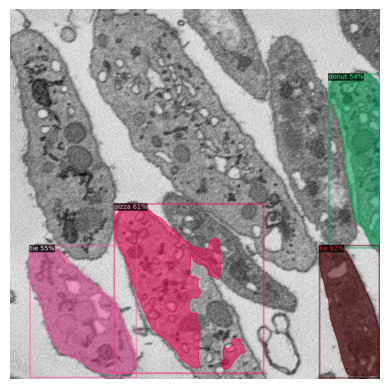

In [19]:
sci_outputs = predictor(sci_im)
sci_v = Visualizer(sci_im[:, :, ::-1], MetadataCatalog.get(cfg_inst.DATASETS.TRAIN[0]))
sci_out = sci_v.draw_instance_predictions(sci_outputs["instances"].to("cpu"))

plt.imshow(sci_out.get_image()[:, :, ::-1])
plt.axis('off')
plt.show()

We need to train a custom model using our own data and labels. (Next tutorial)